### Calculating the Return of a Portfolio of Securities - TATAMOTORS, INFY, ICICIBANK, HINDALCO

In [36]:
import numpy as np
import pandas as pd
import nsepy as nse
import matplotlib.pyplot as plt

In [37]:
from nsepy import get_history
from datetime import date

In [38]:
tickers = ['TATAMOTORS', 'INFY', 'ICICIBANK', 'HINDALCO']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = nse.get_history(t, index = False, start = date(2018, 1, 1), end = date(2023, 3, 23))['Close']

In [39]:
mydata

,TATAMOTORS,INFY,ICICIBANK,HINDALCO
Date,,,,
2018-01-01,424.45,1033.55,310.30,271.15
2018-01-02,439.30,1029.70,309.70,271.90
2018-01-03,433.90,1021.30,315.00,276.50
2018-01-04,429.95,1015.40,314.70,279.80
2018-01-05,431.60,1012.00,312.90,276.40
...,...,...,...,...
2023-03-17,419.00,1420.70,836.25,396.70
2023-03-20,410.75,1403.65,836.45,385.75
2023-03-21,412.55,1390.70,852.40,388.55


In [40]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1296 entries, 2018-01-01 to 2023-03-23
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TATAMOTORS  1296 non-null   float64
 1   INFY        1296 non-null   float64
 2   ICICIBANK   1296 non-null   float64
 3   HINDALCO    1296 non-null   float64
dtypes: float64(4)
memory usage: 50.6+ KB


### Normalization to 100:

$$
\frac {P_t}{P_0} * 100
$$

In [41]:
(mydata/ mydata.iloc[0]*100)

,TATAMOTORS,INFY,ICICIBANK,HINDALCO
Date,,,,
2018-01-01,100.000000,100.000000,100.000000,100.000000
2018-01-02,103.498645,99.627497,99.806639,100.276600
2018-01-03,102.226411,98.814765,101.514663,101.973078
2018-01-04,101.295795,98.243917,101.417983,103.190116
2018-01-05,101.684533,97.914953,100.837899,101.936198
...,...,...,...,...
2023-03-17,98.715985,137.458275,269.497261,146.302784
2023-03-20,96.772294,135.808621,269.561714,142.264429
2023-03-21,97.196372,134.555658,274.701901,143.297068


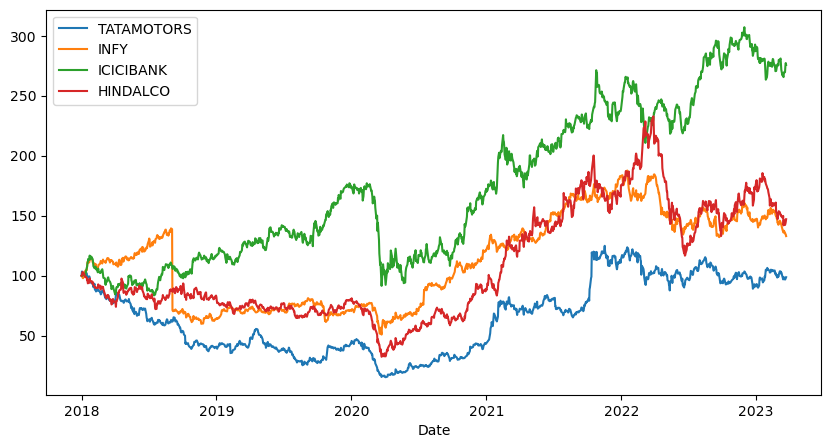

In [42]:
(mydata/ mydata.iloc[0]*100).plot(figsize=(10, 5));
plt.show()

## Calculating the Return of a Portfolio of Securities

In [43]:
simple_returns = (mydata / mydata.shift(1)) - 1
returns = simple_returns.astype('float64')
returns

,TATAMOTORS,INFY,ICICIBANK,HINDALCO
Date,,,,
2018-01-01,NaN,NaN,NaN,NaN
2018-01-02,0.034986,-0.003725,-0.001934,0.002766
2018-01-03,-0.012292,-0.008158,0.017113,0.016918
2018-01-04,-0.009103,-0.005777,-0.000952,0.011935
2018-01-05,0.003838,-0.003348,-0.005720,-0.012152
...,...,...,...,...
2023-03-17,0.007938,0.011823,0.014990,0.030523
2023-03-20,-0.019690,-0.012001,0.000239,-0.027603
2023-03-21,0.004382,-0.009226,0.019069,0.007259


##### Equal Weights

In [44]:
weights_1 = np.array([0.25, 0.25, 0.25, 0.25])

In [45]:
np.dot(returns, weights_1)

array([       nan, 0.00802345, 0.00339533, ..., 0.00537089, 0.00688061,
       0.00165774])

In [46]:
annual_returns = returns.mean()*250
annual_returns

TATAMOTORS    0.112821
INFY          0.130404
ICICIBANK     0.255162
HINDALCO      0.162796
dtype: float64

In [47]:
round(np.dot(annual_returns, weights_1),5)

0.1653

In [48]:
pfolio_1 = str(round(np.dot(annual_returns, weights_1),4)*100) + '%'
print (pfolio_1)

16.53%


##### Unequal Weights

In [49]:
weights_2 = np.array([0.4, 0.30, 0.20, 0.10])

In [50]:
round(np.dot(annual_returns, weights_2),4)

0.1516

In [51]:
pfolio_2 = str(round(np.dot(annual_returns, weights_2),4)*100) + '%'
print (pfolio_2)

15.160000000000002%


In [52]:
print (pfolio_1)
print (pfolio_2)

16.53%
15.160000000000002%
